# Understanding Traffic Accidents in Nigeria (2020 - 2024)

##### Using data obtained from Kaggle, I'll perform an analysis of traffic accidents in various regions of Nigeria to identify trends and the underlying causes of these accidents in an effort to promote road safety.

In [17]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy import stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [23]:
df1 = pd.read_csv('traffic_crashes.csv')
df1 = DataFrame(df1)
df1.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


### Data Cleaning and Organization

In [24]:
df1.rename(columns={'Quarter':'quarter', 'State':'state', 'Total_Crashes':'total_crashes', 'Num_Injured':'num_injured', 'Num_Killed':'num_killed',
                    'Total_Vehicles_Involved':'total_vehicles_involved', 'SPV':'speed_violation', 'DAD':'driving_under_influence', 'PWR':'poor_weather',
                    'FTQ':'fatigue', 'Other_Factors':'other_factors'}, inplace=True)
df1.head()

,quarter,state,total_crashes,num_injured,num_killed,total_vehicles_involved,speed_violation,driving_under_influence,poor_weather,fatigue,other_factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


In [25]:
df1.isnull().sum()

quarter                    0
state                      0
total_crashes              0
num_injured                0
num_killed                 0
total_vehicles_involved    0
speed_violation            0
driving_under_influence    0
poor_weather               0
fatigue                    0
other_factors              0
dtype: int64

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   quarter                  518 non-null    object
 1   state                    518 non-null    object
 2   total_crashes            518 non-null    int64 
 3   num_injured              518 non-null    int64 
 4   num_killed               518 non-null    int64 
 5   total_vehicles_involved  518 non-null    int64 
 6   speed_violation          518 non-null    int64 
 7   driving_under_influence  518 non-null    int64 
 8   poor_weather             518 non-null    int64 
 9   fatigue                  518 non-null    int64 
 10  other_factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


## Exploratory Data Analysis

In [32]:
df1.describe()

,total_crashes,num_injured,num_killed,total_vehicles_involved,speed_violation,driving_under_influence,poor_weather,fatigue,other_factors
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,83.517375,245.631274,40.600386,100.667954,37.903475,0.140927,0.355212,23.824324,38.444015
std,77.023061,201.131483,36.858302,108.567113,57.093042,0.454320,1.677385,51.024267,61.983992
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.000000
25%,30.000000,96.250000,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,58.000000,185.500000,30.000000,64.000000,15.000000,0.000000,0.000000,0.000000,27.000000
75%,107.750000,331.500000,55.750000,134.750000,55.000000,0.000000,0.000000,21.000000,57.000000
max,538.000000,1149.000000,224.000000,864.000000,340.000000,4.000000,25.000000,425.000000,586.000000


### Total Crashes by State

In [45]:
most_total_crashes = df1[['state', 'total_crashes']]
most_total_crashes = most_total_crashes.groupby('state')['total_crashes'].sum().reset_index()
most_total_crashes.head(10)

,state,total_crashes
0,Abia,339
1,Adamawa,829
2,Akwa Ibom,240
3,Anambra,634
4,Bauchi,1661
5,Bayelsa,141
6,Benue,879
7,Borno,366
8,Cross River,410
9,Delta,670


In [46]:
from matplotlib import rcParams

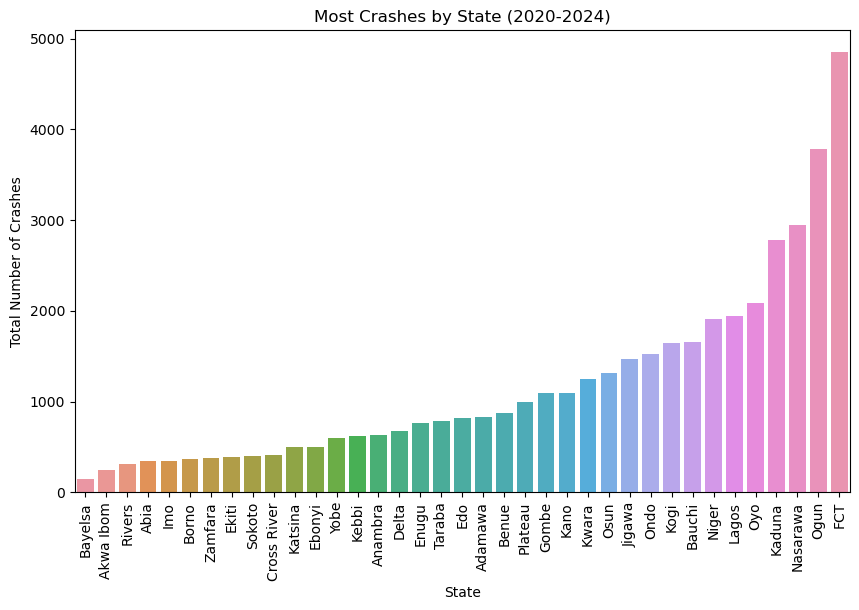

In [62]:
rcParams['figure.figsize'] = 10,6
most_total_crashes = most_total_crashes.sort_values(by='total_crashes')
ax = sns.barplot(data=most_total_crashes, x='state', y='total_crashes')
ax.set_title('Most Crashes by State (2020-2024)')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Number of Crashes')

plt.show()

##### This graph shows us that the FCT has the highest number of traffic accidents in this dataset being just under 5000 followed by Ogun, Nasarawa, Oyo, and Lagos.

### Total Injured Persons by State

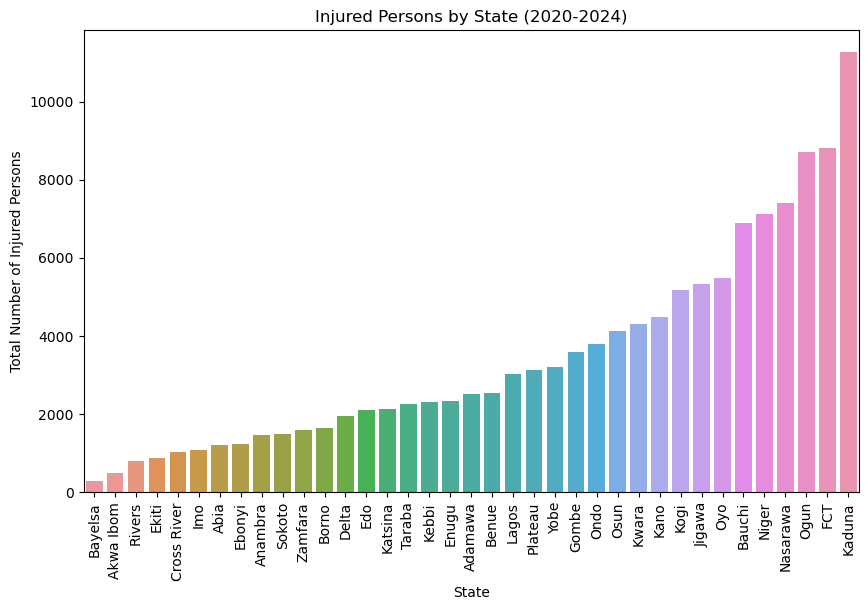

In [65]:
total_injured_persons = df1[['state', 'num_injured']]
total_injured_persons = total_injured_persons.groupby('state')['num_injured'].sum().reset_index().sort_values(by='num_injured')

ax = sns.barplot(data=total_injured_persons, x='state', y='num_injured')
ax.set_title('Injured Persons by State (2020-2024)')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Number of Injured Persons')

plt.show()


##### Kaduna has the highest total number of injured persons in this dataset, followed by FCT, Ogun, and Nasarawa.

### Total Fatalities by State

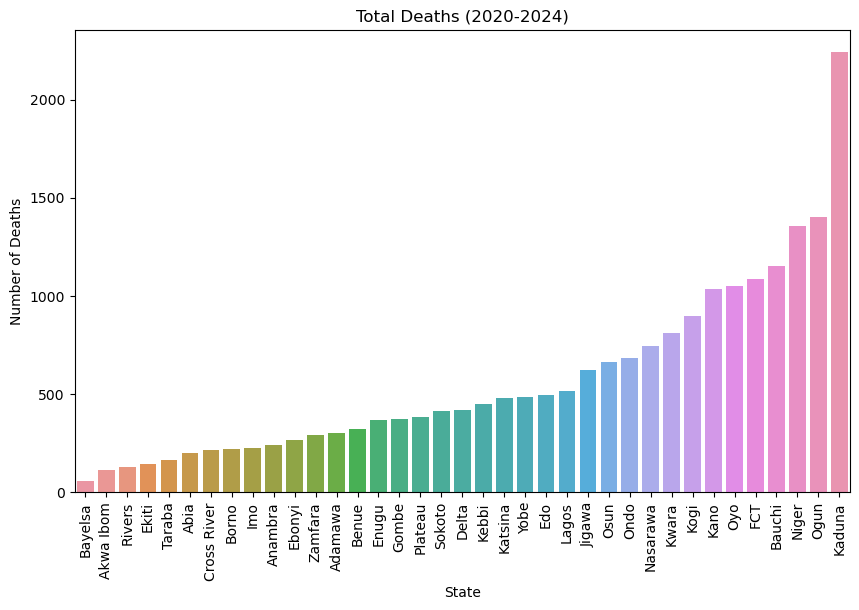

In [72]:
total_deaths = df1[['state', 'num_killed']]
total_deaths = total_deaths.groupby('state')['num_killed'].sum().reset_index().sort_values(by='num_killed')

ax = sns.barplot(data=total_deaths, x='state', y='num_killed')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
ax.set_title('Total Deaths (2020-2024)')

plt.show()

##### Kaduna holds the title for highest total traffic-related deaths, making it the leaders in two variables of this dataset so far as well as the most fatal state in the country.

### Crashes, Injuries, and Fatalities by Year

In [73]:
df1.head(2)

,quarter,state,total_crashes,num_injured,num_killed,total_vehicles_involved,speed_violation,driving_under_influence,poor_weather,fatigue,other_factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37


In [86]:
cifq = df1[['quarter', 'total_crashes', 'num_injured', 'num_killed']]
cifq['quarter'] = cifq['quarter'].astype(str)

In [89]:
cifq['year'] = cifq['quarter'].str.split().str[-1]
cifq.drop('quarter', axis=1, inplace=True)
cifq.head()

,total_crashes,num_injured,num_killed,year
0,30,146,31,2020
1,77,234,36,2020
2,22,28,7,2020
3,72,152,20,2020
4,154,685,90,2020


In [94]:
cifq = cifq.groupby('year')[['total_crashes', 'num_injured', 'num_killed']].sum().reset_index().sort_values(by='year')
cifq.head()

,year,total_crashes,num_injured,num_killed
0,2020,3313,9702,1818
1,2021,13027,38073,6205
2,2022,13656,38930,6456
3,2023,10604,31873,5081
4,2024,2662,8659,1471


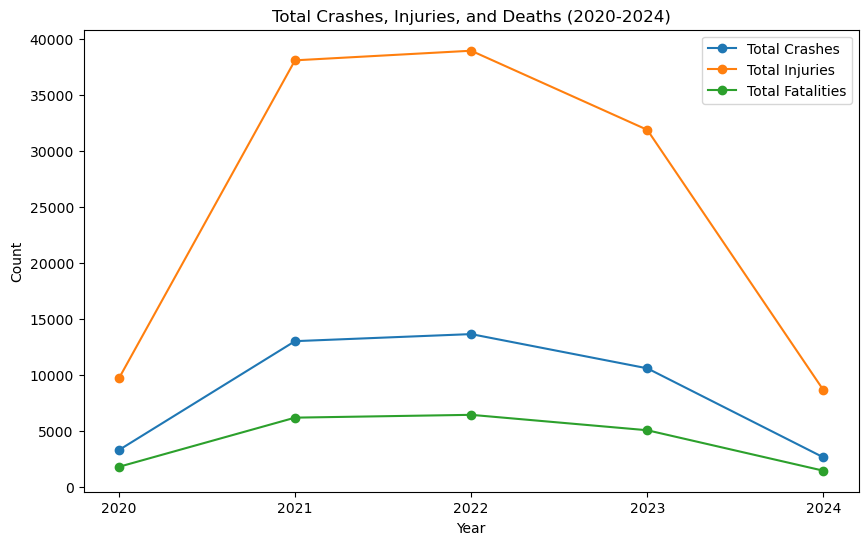

In [96]:
plt.plot(cifq['year'], cifq['total_crashes'], label='Total Crashes', marker='o')
plt.plot(cifq['year'], cifq['num_injured'], label='Total Injuries', marker='o')
plt.plot(cifq['year'], cifq['num_killed'], label='Total Fatalities', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Crashes, Injuries, and Deaths (2020-2024)')
plt.legend()

plt.show()

##### The dataset contains only Q4 of 2020 and Q1 of 2024. Looking at 2021-2023, we see an interesting across all three variables. Although 2021 was a year filled with COVID lockdowns and restrictions, it still saw more crashes, injuries, and deaths than 2023.

In [103]:
df1.head(10)

,quarter,state,total_crashes,num_injured,num_killed,total_vehicles_involved,speed_violation,driving_under_influence,poor_weather,fatigue,other_factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
5,Q4 2020,Bayelsa,1,3,0,1,1,0,0,0,0
6,Q4 2020,Benue,77,177,25,81,81,0,0,0,0
7,Q4 2020,Borno,25,67,16,18,11,0,0,0,7
8,Q4 2020,Cross River,33,65,11,39,23,0,0,0,16
9,Q4 2020,Delta,67,182,36,111,70,0,0,0,41
